<a href="https://colab.research.google.com/github/cohmathonc/biosci670/blob/master/GrowthModels/GrowthModels_LogGrowthNumerical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
from scipy.integrate import ode
from ipywidgets import interactive,IntSlider,FloatSlider


Let's S be the susceptable population, I the infected populatioin, R the fraction of the population removed from the desease (recovered or death) The SRI model describe 
$
\begin{cases}
\frac{dS}{dt}=-\frac{\beta I S}{N},\\
\frac{dI}{dt}=\frac{\beta I S}{N}-\gamma I,\\
\frac{dR}{dt}=\gamma I
\end{cases}
$


Because $N$ is costantant $S(0)+I(0)+R(0)=N$ and in general $S(t)+I(t)+R(t)=N$. We can consider $N=1$ and $S(t)+I(t)+R(t)=1$, so that value of S,I,R represent the fraction of Succetable, Infected and Removed in the population.
Without loss of generality we can rewrite the system  as:

$
\begin{cases}
\frac{dS}{dt}=-\beta I S,\\
\frac{dI}{dt}=\beta I S-\gamma I,\\
\frac{dR}{dt}=\gamma I
\end{cases}
$

We are interested when $\frac{dI}{dt}<0$ that occur when $\beta I S-\gamma I<0$ that occur when $I\gamma(\frac{\beta S}{\gamma}-1)$. We define $R_{o}=\frac{\beta}{\gamma}$, then $SR_{o}<1$

In [ ]:
def ode_SIR(t, Y,beta,gamma):
    A=beta*Y[1]*Y[0]
    B=gamma*Y[1]
    return [-A,A-B,B]

In [ ]:
r=ode(ode_SIR)
S0=0.99
I0=1-S0
R0=1-I0-S0
SIR0=[S0,I0,R0]
beta=0.05
gamma=0.01
r.set_initial_value(SIR0, 0).set_f_params(beta,gamma)
t1=365*2
dt=1
sol=[]
while r.successful() and r.t < t1:
  sol.append(np.concatenate(([r.t+dt],r.integrate(r.t+dt))))
sol=np.array(sol)


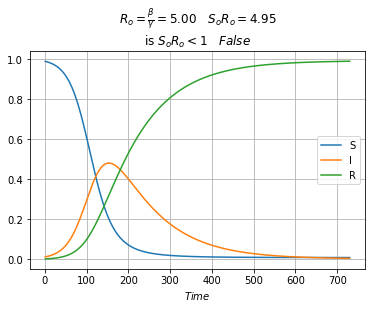

In [ ]:
plt.plot(sol[:,0],sol[:,1],label='S')
plt.plot(sol[:,0],sol[:,2],label='I')
plt.plot(sol[:,0],sol[:,3],label='R')
plt.xlabel(r"$Time$")
plt.legend();
plt.title(r"$R_o=\frac{\beta}{\gamma}=%1.2f \quad S_o R_o=%1.2f$"%(beta/gamma,S0*beta/gamma)+'\nis '+"$S_o R_o<1 \quad %s$"%(S0*beta/gamma<1))
plt.grid()

In [ ]:
def update(i0,beta,gamma,t1):
    S0=1-i0
    SIR0=[S0,i0,0]
    r.set_initial_value(SIR0, 0).set_f_params(beta,gamma)
    dt=1
    sol=[]
    while r.successful() and r.t < t1:
      sol.append(np.concatenate(([r.t+dt],r.integrate(r.t+dt))))
    sol=np.array(sol)
    
    plt.figure()
    [plt.plot(sol[:,0],sol[:,i]) for i in (1,2,3)]
    
    plt.title(r"$R_o=\frac{\beta}{\gamma}=%1.4f \quad S_o R_o=%1.2f$"
             %(beta/gamma,S0*beta/gamma)+'\nis '+"$S_o R_o<1 \quad %s$"
             %(S0*beta/gamma<1))
    plt.grid()
    plt.show()
r=ode(ode_SIR)
#interactive_plot = interactive(update, i0=(0, 0.2,0.01), beta=(0.01, 0.2, 0.002)
#                               ,gamma=(0.001,0.1,0.002),t1=(700,1000,5))
timeSlider=IntSlider(value=360,min=300,max=1080,step=30,description="days")

iniInfectedSlider=FloatSlider(value=0.01, min=0.,max=0.3,step=0.01,description="i0")
betaSlider=FloatSlider(value=0.05, min=0.01,max=0.2,step=0.01,readout_format='.2f',description=r'<MATH>&beta;</MATH>')
gammaSlider=FloatSlider(value=0.01, min=0.,max=0.3,step=0.01,description=r'<MATH>&gamma;</MATH>')
interactive_plot = interactive(update, t1=timeSlider,i0=iniInfectedSlider,gamma=gammaSlider, beta=betaSlider)
output = interactive_plot.children[-1]
output.layout.height = '450px'
interactive_plot

interactive(children=(FloatSlider(value=0.01, description='i0', max=0.3, step=0.01), FloatSlider(value=0.05, d…

If we consider that during the dynamics over long period of time we need to account for the fact newborn and natural death. We can consider this new system of ODEs:
$
\begin{cases}
\frac{dS}{dt}=\Lambda -\beta I S -\mu S,\\
\frac{dI}{dt}=\beta I S-\gamma I -\mu I,\\
\frac{dR}{dt}=\gamma I -\mu R
\end{cases}
$

Moreover, if we impose that the population is constant and equal 1 i.e. $S(t)+I(t)+R(t)=1$ it can be easilly show that $\Lambda=\mu$

We are in general interested to stationary state i.e. when $\frac{dS}{dt}=\frac{dI}{dt}=\frac{dR}{dt}=0$
a trivial solution can be easilly found for $(S_{\infty}=1;I_{\infty}=0;R_{\infty}=0)$.
If $I_{\infty}>0$, we can show that stationary solution are:

$
S_{\infty}=R_o^{-1},\\
I_{\infty}=\frac{\mu}{\beta}(R_o-1),\\
R_{\infty}=\frac{\gamma}{\beta}(R_o-1),\\
$

with $R_o=\frac{\beta}{\gamma+\mu}$
We also point that, for virus to remain endemic in the population, we must have $(R_o-1)>0$ i.e. $\frac{\beta}{\gamma+\mu}>1$
 

In [ ]:
def ode_SIR_vd(t, Y,beta,gamma,mu):
    Lambda=mu
    A=beta*Y[1]*Y[0]
    B=gamma*Y[1]
    return [Lambda -A-mu*Y[0],A-B-mu*Y[1],B-mu*Y[2]]

[[<matplotlib.lines.Line2D at 0x7f3f89b3af10>],

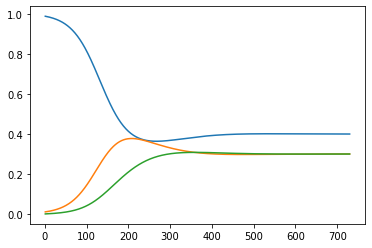

In [ ]:
r=ode(ode_SIR_vd)
i0=0.01
S0=1-i0
SIR0=[S0,i0,0]
mu=0.01
r.set_initial_value(SIR0, 0).set_f_params(beta,gamma,mu)
dt=1
sol=[]
while r.successful() and r.t < t1:
  sol.append(np.concatenate(([r.t+dt],r.integrate(r.t+dt))))
sol=np.array(sol)
plt.figure()
[plt.plot(sol[:,0],sol[:,i]) for i in (1,2,3)]

In [ ]:
def updateSIR_vd(i0,beta,gamma,mu,t1):
    def fooPlot(ax,sol,i,j,mytitle):
      '''
        simple function to format phase space plot
      '''
      ax.plot(sol[:,i],sol[:,j])
      ax.set_title(mytitle)
      ax.grid()
    S0=1-i0
    SIR0=[S0,i0,0]
    r.set_initial_value(SIR0, 0).set_f_params(beta,gamma,mu)
    dt=1
    sol=[]
    Ro=beta/(gamma+mu)
    while r.successful() and r.t < t1:
      sol.append(np.concatenate(([r.t+dt],r.integrate(r.t+dt))))
    sol=np.array(sol)
    ax=plt.subplot(211)
    #plt.figure()
    mycolors=['b','r','g']
    ax.hlines(1/Ro,0,t1,color='b',ls=':')
    ax.hlines(mu*(Ro-1)/beta,0,t1,color='r',ls=':')
    ax.hlines(gamma*(Ro-1)/beta,0,t1,color='g',ls=':')
    ax.set_title(r"$R_o=\frac{\beta}{\gamma+\mu}=%.2f$"
        %(Ro)+'\nis '+r"$R_o<1 \quad %s$"
        %(Ro<1))
    [ax.plot(sol[:,0],sol[:,i],color=mycolors[i-1]) for i in (1,2,3)]
    plt.grid()
    
    fooPlot(plt.subplot(234),sol,1,2,r"$S vs I$")
    fooPlot(plt.subplot(235),sol,1,3,r"$S vs R$")
    fooPlot(plt.subplot(236),sol,2,3,r"$I vs R$")
    

    plt.tight_layout()
    plt.show()
r=ode(ode_SIR_vd)
#interactive_plot = interactive(update, i0=(0, 0.2,0.01), beta=(0.01, 0.2, 0.002)
#                               ,gamma=(0.001,0.1,0.002),t1=(700,1000,5))
timeSlider=IntSlider(value=360,min=300,max=4000,step=30,description="days")

iniInfectedSlider=FloatSlider(value=0.01, min=0.,max=0.3,step=0.01,description="i0")
betaSlider=FloatSlider(value=0.05, min=0.01,max=0.2,step=0.01,readout_format='.2f',description=r'<MATH>&beta;</MATH>')
gammaSlider=FloatSlider(value=0.01, min=0.,max=0.3,step=0.01,description=r'<MATH>&gamma;</MATH>')
#LambdaSlider=FloatSlider(value=0.1, min=0.,max=0.3,step=0.01,description=r'<MATH>&Lambda;</MATH>')
muSlider=FloatSlider(value=0.001, min=0.,max=0.02,step=0.002,readout_format='.3f',description=r'<MATH>&Lambda;=&mu;</MATH>')
interactive_plot = interactive(updateSIR_vd,i0=iniInfectedSlider,
                               gamma=gammaSlider, beta=betaSlider,mu=muSlider, t1=timeSlider)
output = interactive_plot.children[-1]
output.layout.height = '450px'
interactive_plot

interactive(children=(FloatSlider(value=0.01, description='i0', max=0.3, step=0.01), FloatSlider(value=0.05, d…

$
\begin{cases}
\frac{dS}{dt}=(1-p)\Lambda -\beta I S -\mu S,\\
\frac{dI}{dt}=\beta I S-\gamma I -\mu I,\\
\frac{dR}{dt}=\gamma I -\mu R,\\
\frac{dV}{dt}=p\Lambda-\mu V,
\end{cases}
$

We have introduced vaccination at birth (V), with p beeing the fraction of childs vaccinated at birth.

Once again under constant (=1) population assumption it can be shown that $\lambda=\mu$

a trivial statinary solution can be easilly found for $(S_{\infty}=1;I_{\infty}=0;R_{\infty}=0)$.
If $I_{\infty}>0$, we can show that stationary solution are:

$
S_{\infty}=R_o^{-1},\\
I_{\infty}=\frac{\mu}{\beta}((1-p)*R_o-1),\\
R_{\infty}=\frac{\gamma}{\beta}((1-p)*R_o-1),\\
$

with $R_o=\frac{\beta}{\gamma+\mu}$
We also point that, for virus to remain endemic in the population, we must have $((1-p)R_o-1)>0$ i.e. $\frac{\beta}{\gamma+\mu}>1$


In [ ]:
def ode_SIRV(t, Y,beta,gamma,mu,p):
    A=beta*Y[1]*Y[0]
    B=gamma*Y[1]
    return [(1-p)*mu -A-mu*Y[0],A-B-mu*Y[1],B-mu*Y[2],mu*(p-Y[3])]

[[<matplotlib.lines.Line2D at 0x7f3f89b26450>],

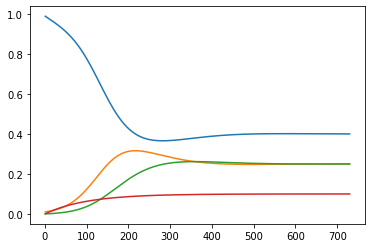

In [ ]:
    S0=1-i0
    SIR0=[S0,i0,0,0]
    r=ode(ode_SIRV)
    p=0.1
    r.set_initial_value(SIR0, 0).set_f_params(beta,gamma,mu,p)
    dt=1
    sol=[]
    while r.successful() and r.t < t1:
      sol.append(np.concatenate(([r.t+dt],r.integrate(r.t+dt))))
sol=np.array(sol)    
plt.figure()
[plt.plot(sol[:,0],sol[:,i]) for i in (1,2,3,4)]

In [ ]:
def updateSIRV(i0,beta,gamma,mu,t1,p):
    def fooPlot(ax,sol,i,j,mytitle):
      '''
        simple function to format phase space plot
      '''
      ax.plot(sol[:,i],sol[:,j])
      ax.set_title(mytitle)
      ax.grid()
    S0=1-i0
    SIR0=[S0,i0,0,0]
    r.set_initial_value(SIR0, 0).set_f_params(beta,gamma,mu,p)
    dt=1
    sol=[]
    while r.successful() and r.t < t1:
      sol.append(np.concatenate(([r.t+dt],r.integrate(r.t+dt))))
    sol=np.array(sol)
    
    Ro=beta/(gamma+mu)

    ax=plt.subplot(211)
    #plt.figure()
    mycolors=['b','r','g','gold']
    ax.hlines(1/Ro,0,t1,color='b',ls=':')
    ax.hlines(mu*((1-p)*Ro-1)/beta,0,t1,color='r',ls=':')
    ax.hlines(gamma*((1-p)*Ro-1)/beta,0,t1,color='g',ls=':')
    ax.hlines(p,0,t1,color='gold',ls=':')
    ax.set_title(r"$(1-p)R_o=\frac{\beta}{\gamma+\mu}=%.2f$"
        %((1-p)*Ro) +'\nis '+r"$(1-p)R_o<1 \quad %s$"
        %((1-p)*Ro<1))
    [ax.plot(sol[:,0],sol[:,i],color=mycolors[i-1]) for i in (1,2,3,4)]
    plt.grid()
    
    fooPlot(plt.subplot(234),sol,1,2,r"$S\quad vs \quad I$")
    fooPlot(plt.subplot(235),sol,1,3,r"$S\quad vs \quad R$")
    fooPlot(plt.subplot(236),sol,2,3,r"$I \quad vs \quad R$")
    

    plt.tight_layout()
    plt.show()
r=ode(ode_SIRV)
#interactive_plot = interactive(update, i0=(0, 0.2,0.01), beta=(0.01, 0.2, 0.002)
#                               ,gamma=(0.001,0.1,0.002),t1=(700,1000,5))
timeSlider=IntSlider(value=360,min=300,max=10000,step=30,description="days")

iniInfectedSlider=FloatSlider(value=0.01, min=0.,max=0.3,step=0.01,description="i0")
betaSlider=FloatSlider(value=0.05, min=0.01,max=0.2,step=0.01,readout_format='.2f',description=r'<MATH>&beta;</MATH>')
gammaSlider=FloatSlider(value=0.01, min=0.,max=0.3,step=0.01,description=r'<MATH>&gamma;</MATH>')
pSlider=FloatSlider(value=0.1, min=0.,max=1,step=0.01,description='p')
muSlider=FloatSlider(value=0.001, min=0.,max=0.02,step=0.002,readout_format='.3f',description=r'<MATH>&mu;</MATH>')
interactive_plot = interactive(updateSIRV,i0=iniInfectedSlider,
                               gamma=gammaSlider, beta=betaSlider,mu=muSlider, t1=timeSlider,p=pSlider
                               )
output = interactive_plot.children[-1]
output.layout.height = '550px'
interactive_plot

interactive(children=(FloatSlider(value=0.01, description='i0', max=0.3, step=0.01), FloatSlider(value=0.05, d…